In [3]:
# Cell 1: Imports and Spark Setup
import pandas as pd
import matplotlib.pyplot as plt
from folium import Map
from folium.plugins import HeatMap
from pyspark.sql import SparkSession

# Paths to summary CSV directories on HDFS
EDA_BASE = "hdfs://localhost:9000/user/yashwanthreddy/crime/eda_output"

In [5]:
# Cell 2: Load Summary Tables via Spark
spark = SparkSession.builder \
    .appName("EDAVisualization") \
    .config("spark.sql.shuffle.partitions", "50") \
    .getOrCreate()

# Read core summary outputs
crime_type_df      = spark.read.csv(f"{EDA_BASE}/crime_type_counts", header=True, inferSchema=True)
outcome_type_df    = spark.read.csv(f"{EDA_BASE}/outcome_type_counts", header=True, inferSchema=True)
ym_df              = spark.read.csv(f"{EDA_BASE}/year_month_trend", header=True, inferSchema=True)
hod_df             = spark.read.csv(f"{EDA_BASE}/counts_by_hour", header=True, inferSchema=True)
dow_df             = spark.read.csv(f"{EDA_BASE}/counts_by_dow", header=True, inferSchema=True)
distinct_crime_df  = spark.read.csv(f"{EDA_BASE}/distinct_crime_types", header=True, inferSchema=True)
top10_lsoas_df     = spark.read.csv(f"{EDA_BASE}/top10_lsoas", header=True, inferSchema=True)
coord_stats_df     = spark.read.csv(f"{EDA_BASE}/coordinate_stats", header=True, inferSchema=True)
stop_obj_df        = spark.read.csv(f"{EDA_BASE}/stop_object_counts", header=True, inferSchema=True)
stop_outcome_df    = spark.read.csv(f"{EDA_BASE}/stop_outcome_linked_counts", header=True, inferSchema=True)

# Convert to Pandas
crime_types     = crime_type_df.toPandas()
outcome_types   = outcome_type_df.toPandas()
monthly         = ym_df.toPandas()
hod             = hod_df.toPandas()
dow             = dow_df.toPandas()
distinct_crime  = distinct_crime_df.toPandas()
top10_lsoas     = top10_lsoas_df.toPandas()
coord_stats     = coord_stats_df.toPandas()
stop_objects    = stop_obj_df.toPandas()
stop_outcomes   = stop_outcome_df.toPandas()

# Parse date index for monthly series
monthly['date'] = pd.to_datetime(
    dict(year=monthly['year'], month=monthly['month'], day=1)
)
monthly.set_index('date', inplace=True)

spark.stop()


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/05/09 22:55:22 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/05/09 22:55:22 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [7]:
# Cell 3: Display Summary Tables
print("=== Top Crime Types ===")
print(crime_types.sort_values('count', ascending=False).head(10))

print("\n=== Outcome Type Counts ===")
print(outcome_types.sort_values('count', ascending=False).head(10))

print("\n=== Distinct Crime Types ===")
print(distinct_crime)

print("\n=== Top 10 LSOAs ===")
print(top10_lsoas)

print("\n=== Coordinate Stats ===")
print(coord_stats)

print("\n=== Stop-and-Search Objects ===")
print(stop_objects.sort_values('count', ascending=False).head(10))

print("\n=== Stop-and-Search Outcomes ===")
print(stop_outcomes.sort_values('count', ascending=False).head(10))

=== Top Crime Types ===
                      crime_type    count
3   violence and sexual offences  4182041
13         anti-social behaviour  1260059
6                   public order   978197
0      criminal damage and arson   948394
11                   other theft   699381
2                    shoplifting   656743
1                  vehicle crime   545668
5                       burglary   441037
10                         drugs   282712
7                    other crime   213210

=== Outcome Type Counts ===
                                         outcome_type    count
1                         unable to prosecute suspect  3689696
12      investigation complete; no suspect identified  3014043
9                                                None  2617776
4                                     suspect charged   602263
11                                   local resolution   216299
7          action to be taken by another organisation   119672
3   further investigation is not in the publ

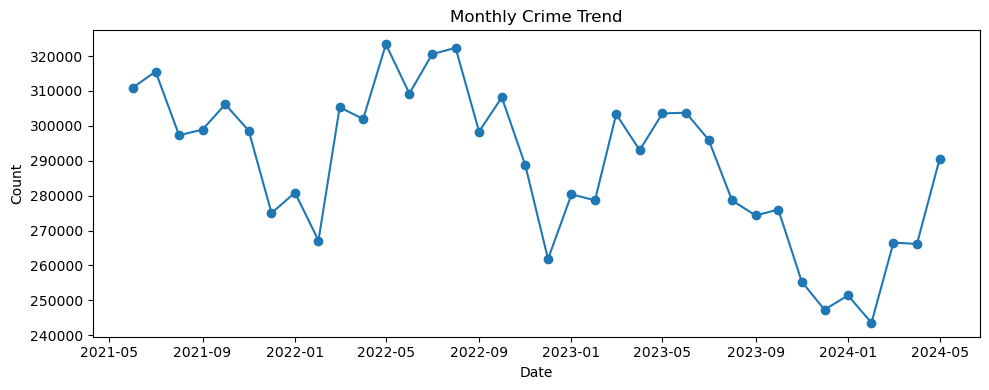

In [9]:
# Cell 4: Plot Monthly Trend
plt.figure(figsize=(10,4))
plt.plot(monthly['count'], marker='o')
plt.title('Monthly Crime Trend')
plt.xlabel('Date')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

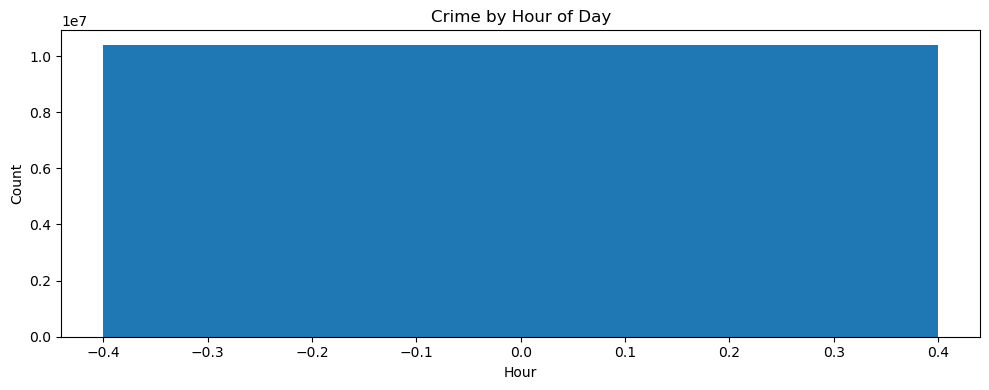

In [11]:
# Cell 5: Plot Hour-of-Day Distribution
plt.figure(figsize=(10,4))
plt.bar(hod['hour'], hod['count'])
plt.title('Crime by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

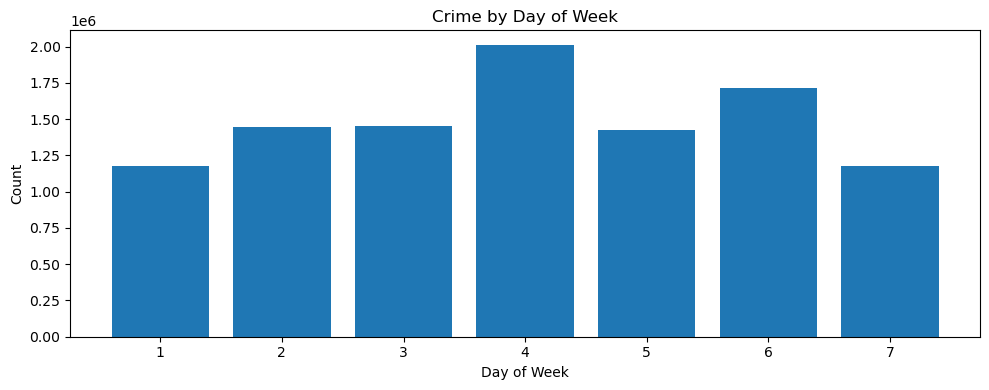

In [13]:
# Cell 6: Plot Day-of-Week Distribution
plt.figure(figsize=(10,4))
plt.bar(dow['dow'], dow['count'])
plt.title('Crime by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


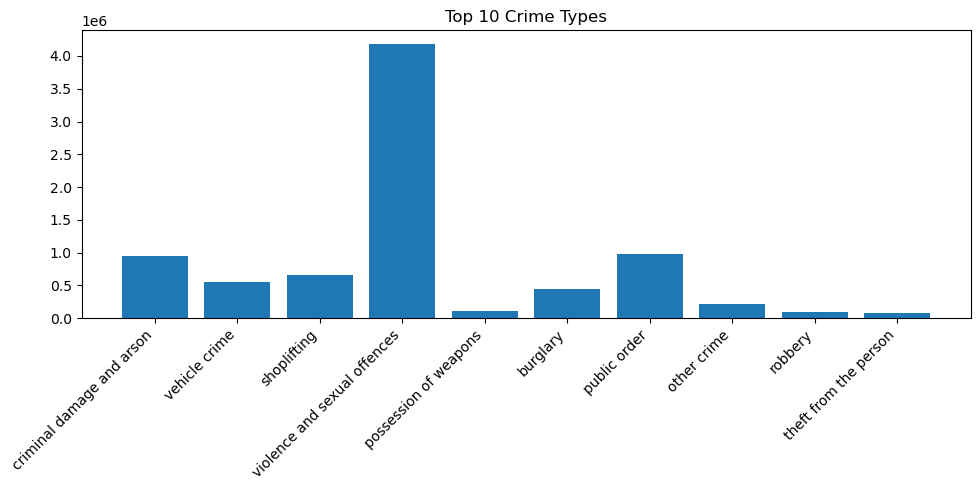

In [19]:
# Cell 7: Plot Top Crime Types Bar Chart
plt.figure(figsize=(10,5))
labels_ct = crime_types['crime_type'].fillna('Unknown').astype(str).head(10)
counts_ct = crime_types['count'].head(10)
plt.bar(labels_ct, counts_ct)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Crime Types')
plt.tight_layout()
plt.show()

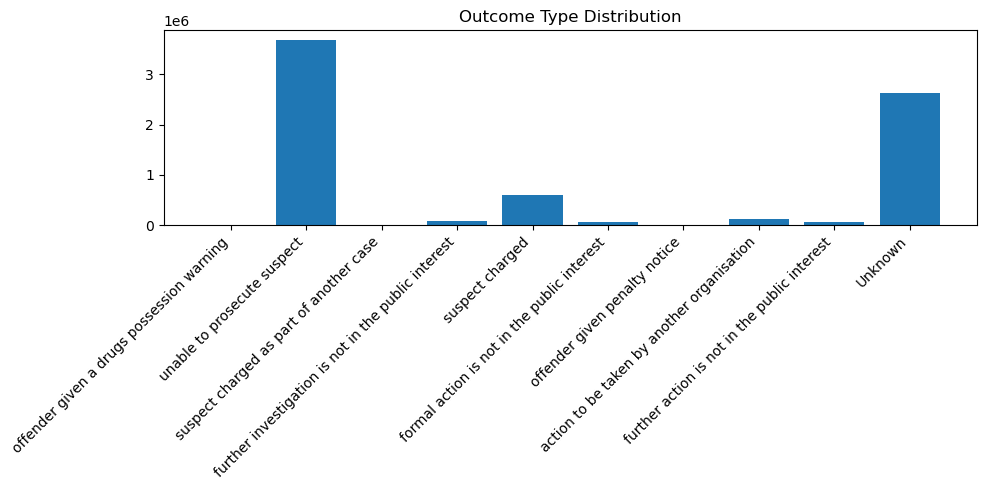

In [21]:
# Cell 8: Plot Outcome Types Bar Chart
plt.figure(figsize=(10,5))
labels_ot = outcome_types['outcome_type'].fillna('Unknown').astype(str).head(10)
counts_ot = outcome_types['count'].head(10)
plt.bar(labels_ot, counts_ot)
plt.xticks(rotation=45, ha='right')
plt.title('Outcome Type Distribution')
plt.tight_layout()
plt.show()

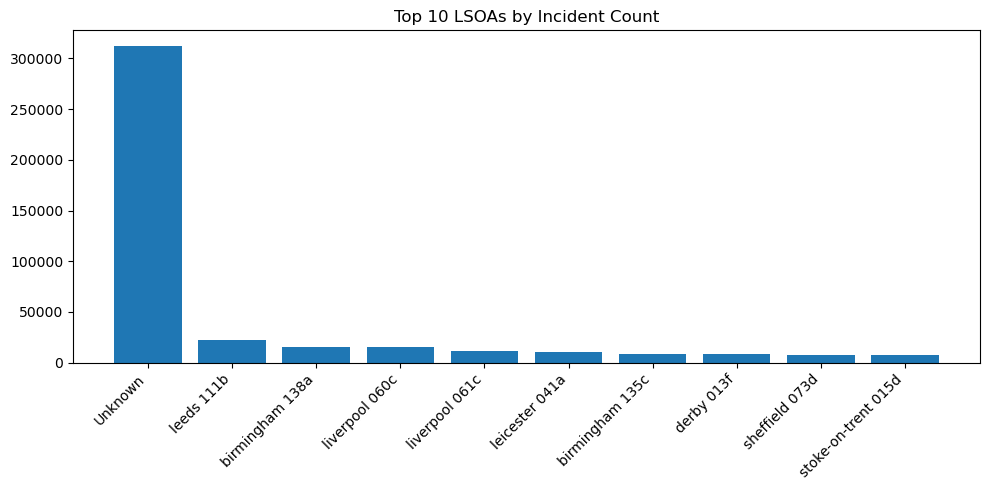

In [23]:
# Cell 9: Plot Top 10 LSOAs Bar Chart
plt.figure(figsize=(10,5))
labels_ls = top10_lsoas['lsoa_name'] if 'lsoa_name' in top10_lsoas.columns else top10_lsoas['lsoa_code']
labels_ls = labels_ls.fillna('Unknown').astype(str)
plt.bar(labels_ls, top10_lsoas['count'])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 LSOAs by Incident Count')
plt.tight_layout()
plt.show()

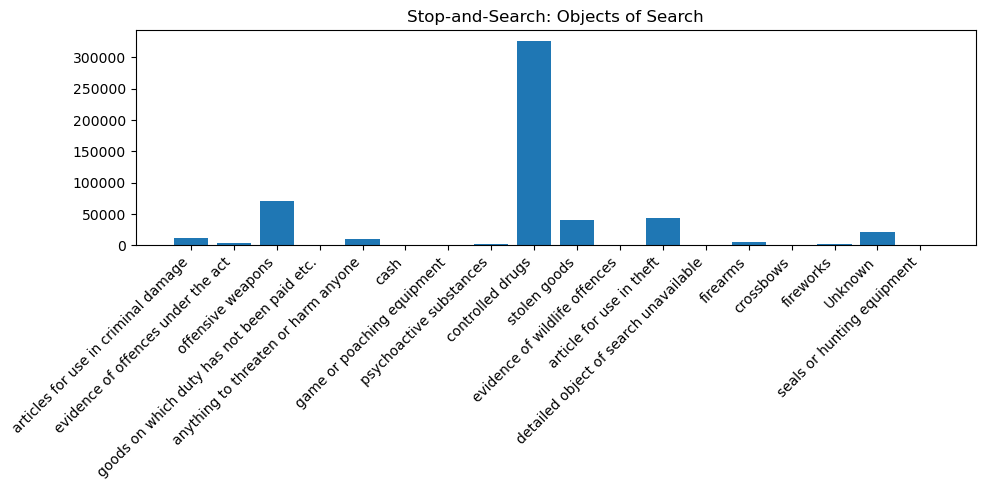

In [25]:
# Cell 10: Plot Stop-and-Search Object Counts
plt.figure(figsize=(10,5))
labels_so = stop_objects['object_of_search'].fillna('Unknown').astype(str)
counts_so = stop_objects['count']
plt.bar(labels_so, counts_so)
plt.xticks(rotation=45, ha='right')
plt.title('Stop-and-Search: Objects of Search')
plt.tight_layout()
plt.show()

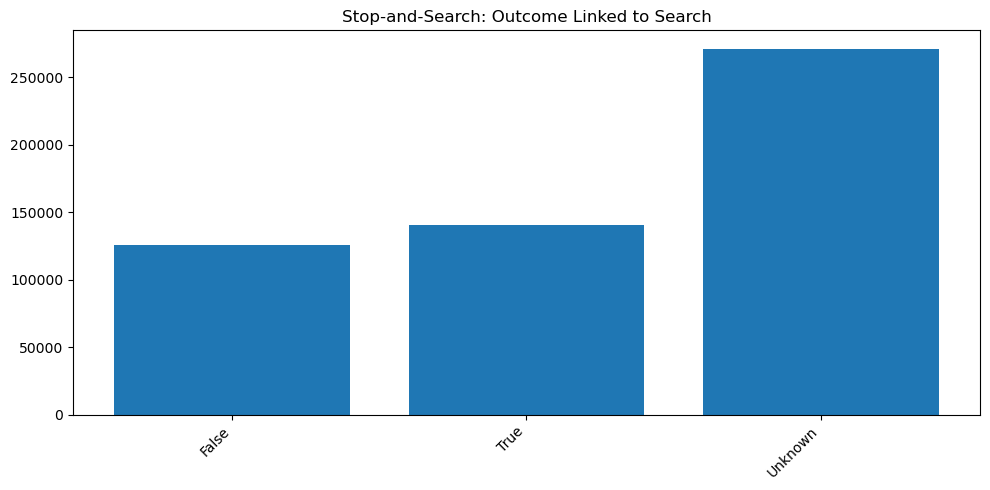

In [27]:
# Cell 11: Plot Stop-and-Search Outcome Counts
plt.figure(figsize=(10,5))
labels_soo = stop_outcomes['outcome_linked_to_object_of_search'].fillna('Unknown').astype(str)
counts_soo = stop_outcomes['count']
plt.bar(labels_soo, counts_soo)
plt.xticks(rotation=45, ha='right')
plt.title('Stop-and-Search: Outcome Linked to Search')
plt.tight_layout()
plt.show()